# Jordan Bird

## Research question/interests

Coming from a health sciences background, I’m interested in looking at a couple of different angles of this dataset:

I am interested in looking at the trends of cardiovascular disease (i.e., atrial fibrillation, heart failure, hypertension, ischemia heart disease, stroke or TIA) in the five US regions (i.e., West, Midwest, Southwest, Southeast, Northeast) and how it has changed over the 6 years of 2006-2012. This is the first step before correlating it to utilization of Medicare and Medicaid services to determine what percentage of the overall healthcare system is from cardiovascular disease. Hopefully we will be able to pinpoint areas of higher cardiovascular risk and tie it into historical census data for why higher cardiovascular disease rates may be higher in some areas of the country.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as p1

## Data Cleaning

In [61]:
p1.connecting_unprocessed('../data/raw/group36_MedicareData.xlsx').head(3)

,Year,State,Number of People by Medicare-Medicaid Enrollment Type,Number of People,Number of People with FFS,Number of Females with FFS,Number of Males with FFS,Percent with all 12 months in FFS Medicaid,Percent with all 12 months in FFS Medicare,Percent with all 12 months with Medicare Part D coverage,...,Total Medicaid personal care payments,Total Medicaid targeted case management payments,Total Medicaid clinic payments,Total Medicaid dental payments,Total Medicaid transportation service payments,Total Medicaid other service payments,Total Medicaid managed care payments,Percent of Medicaid enrollees with Home and Community Based Services waiver payments,Percent of Medicaid enrollees without Home and Community Based Services waiver payments,Percent with Medicaid non facility-based long term care services (home health or Personal Care Services)
0,2006,National,Full Benefit,6658396,6111263,3828000,2283263,0.646,0.867,0.992,...,6660915505,567537224,801943674,298838731,784904589,16699295385,4249936621,0.0941,0.363,0.199
1,2006,National,Partial Benefit,1794642,1777803,1088606,689197,0.95,0.838,0.97,...,25134170,11943236,39619512,6666429,15274245,114871687,51567102,0.005,0.0777,0.014
2,2006,National,Medicare Only,37165285,28517682,15573890,12943789,.,0.765,0.434,...,.,.,.,.,.,.,.,.,.,.


In [3]:
dfu = p1.unprocessed('../data/raw/data.csv')

#### Data Cleaning - Adding State Region column

In [4]:
dfu = p1.add_region_column(dfu)

#### Data Cleaning - Renaming columns

In [5]:
dfu = p1.rename_data(dfu)

#### Data Cleaning - Remove columns

In [6]:
dfu = p1.remove_columns(dfu)

#### Data Cleaning - Replace missing values with NaN

In [7]:
dfu = p1.missing_values(dfu)

#### Data Cleaning - Write .csv file to processed data folder

In [8]:
dfu.to_csv('../data/processed/c_data.csv', sep=',', na_rep='', index=False)

## Process Data

In [9]:
dfc = p1.cleaned_data('../data/processed/c_data.csv')

## Exploratory Data Analysis

In [10]:
print("Number of rows and columns respectively:", dfc.shape)
print("Columns in the dataset:", dfc.columns)

Number of rows and columns respectively: (1456, 52)
Columns in the dataset: Index(['Year', 'State', 'Region',
       'Number of People by Medicare-Medicaid Enrollment Type',
       'Number of People', 'Number of People with FFS',
       'Number of Females with FFS', 'Number of Males with FFS', 'A%_<40',
       'A%_40-64', 'A%_65-84', 'A%_85+', 'F%', 'M%', 'White%', 'AfrA%', 'His%',
       'Asian%', 'Indig%', 'Unknown%', 'ha%', 'af%', 'hf%', 'dm%', 'hc%',
       'hyp%', 'ihd%', 'strokeorTIA%', 'obesity%', 'pad%',
       'Number of FFS people who used Medicare procedures',
       'Number of FFS people who used Medicare imaging services',
       'Number of FFS people who used Medicare laboratory/testing services',
       'Number of FFS people who used Medicare durable medical equipment',
       'Number of people who used Medicare Part D prescription drugs',
       'Total Medicare payments', 'Total Medicare IP Hospital FFS payments',
       'Total Medicare Other IP Hospital FFS payments',


#### Cardiovascular Variable Summary

In [11]:
dfc[['ha%', 'af%', 'hf%', 'dm%', 'hc%', 'hyp%', 'ihd%', 'strokeorTIA%', 'obesity%', 'pad%']].describe().T

,count,mean,std,min,25%,50%,75%,max
ha%,1385.0,0.007931,0.002966,0.0001,0.006000,0.00820,0.009900,0.0209
af%,1436.0,0.047214,0.027135,0.0005,0.022125,0.05060,0.068425,0.1120
hf%,1446.0,0.133520,0.066907,0.0016,0.079400,0.13100,0.172000,0.3080
dm%,1456.0,0.229867,0.084025,0.0028,0.167000,0.24000,0.290000,0.4240
hc%,1444.0,0.269867,0.139578,0.0026,0.153000,0.29350,0.371000,0.6210
hyp%,1454.0,0.404431,0.169476,0.0008,0.248250,0.44900,0.548000,0.6710
ihd%,1450.0,0.211881,0.098325,0.0021,0.121000,0.23000,0.285000,0.4290
strokeorTIA%,1434.0,0.034349,0.018263,0.0030,0.021400,0.03100,0.041275,0.0984
obesity%,1446.0,0.065914,0.031175,0.0009,0.040325,0.06120,0.087075,0.1800
pad%,1440.0,0.084013,0.059851,0.0005,0.035700,0.07525,0.111000,0.3130


#### Analysis:
- The most amount of data is missing from heart attacks (presumably from passing away) while also occuring in the lowest persent of the population (0.79%).
- The most common cardiovascular issue is hypertension at 40.4% of this Medicare/Medicaid population
- In one row of data, 42.4% of the population came in with Diabetes Mellitus. That's a huge percent of any population but very insane in this case.
- As Peripheral Arterial Disease (PAD) is often a subset of Type 2 Diabetes Mellitus cases, it makes sense that in average cases, that PAD occurs in a lower percent of the population

#### Age and Ethnicity Summary

In [12]:
dfc[["A%_<40", "A%_40-64", "A%_65-84", "A%_85+", "F%", "M%", "White%", "AfrA%","His%","Asian%","Indig%","Unknown%"]].describe().T

,count,mean,std,min,25%,50%,75%,max
A%_<40,1448.0,0.180732,0.214602,0.0047,0.015000,0.08520,0.31775,0.728
A%_40-64,1448.0,0.305538,0.141785,0.0305,0.169000,0.33400,0.40825,0.675
A%_65-84,1092.0,0.564909,0.161310,0.2690,0.429000,0.52100,0.76100,0.833
A%_85+,1092.0,0.120036,0.043542,0.0359,0.087375,0.12300,0.14800,0.278
F%,1456.0,0.562986,0.057026,0.4350,0.517000,0.55500,0.61200,0.697
M%,1456.0,0.437014,0.057026,0.3030,0.388000,0.44500,0.48300,0.565
White%,1456.0,0.685083,0.222943,0.0069,0.510500,0.74750,0.86500,0.985
AfrA%,1437.0,0.159678,0.171398,0.0014,0.026200,0.09590,0.22000,0.897
His%,1381.0,0.030176,0.079633,0.0002,0.005200,0.01070,0.02210,0.609
Asian%,1403.0,0.063231,0.092205,0.0001,0.009000,0.02310,0.07525,0.521


#### Analysis
- For age categories, the mean percentage for age categories is >100% based on missing data from the 65-84 and 85+ groupings. This would most likely arise from Medicare not having this information for the 65+ crowd
- Of the data that is present, the majority is still skewed towards 65+ suggesting that there is a greater reliance that falls under Medicare than Medicaid.
- Women were more often enrolled (56.3%) presumably because there are a greater number of women alive, life expectancy is longer, and generally incomes are less which might make more women eligble for Medicaid.
- Not much can be gleaned from the ethnicity as this is not normalized to ethnicity population size year over year. To be able to get a true estimate, it would involve taking total participants and multiplying by ethnic percentage to get a total number of people enrolled in Medicare/Medicaid then dividing total number of people by the yearly national census numbers when controlling for ethnicity.

## Exploratory Data Analysis using National Averages and Year Trends

In [13]:
sns.set(style='darkgrid')

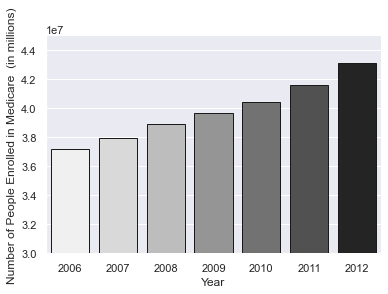

In [14]:
df_nation = dfc.loc[(dfc['State'] == 'National') & (dfc['Number of People by Medicare-Medicaid Enrollment Type'] == 'Medicare Only')]

fig, ax = plt.subplots()
sns.barplot(x='Year', y='Number of People', data=df_nation, palette='Greys', linewidth=1, edgecolor="k")
ax.set(ylim=(3e7,4.5e7), ylabel="Number of People Enrolled in Medicare  (in millions)")
sns.despine(bottom=True)

- Usage of Medicare increased by ~600,000 over the course of the 6 year period (rate increase of ~100,000/year)

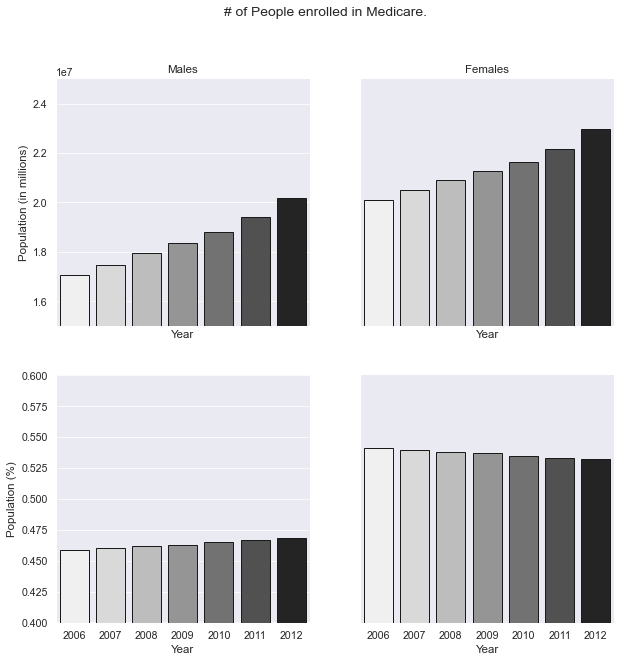

In [63]:
fig, ax = plt.subplots(2,2, sharex=True, figsize=(10,10))
num_males, num_females = df_nation['M%'] * df_nation['Number of People'], df_nation['F%'] * df_nation['Number of People']

fig.suptitle('# of People enrolled in Medicare.')

#Top Graphs
sns.barplot(ax=ax[0,0], x='Year', y=num_males, data=df_nation, palette='Greys', linewidth=1, edgecolor="k")
sns.barplot(ax=ax[0,1], x='Year', y=num_females, data=df_nation, palette='Greys', linewidth=1, edgecolor="k")

#Bottom Graphs
sns.barplot(ax=ax[1,0], x='Year', y='M%', data=df_nation, palette='Greys', linewidth=1, edgecolor="k")
sns.barplot(ax=ax[1,1], x='Year', y='F%', data=df_nation, palette='Greys', linewidth=1, edgecolor="k")

ax[0,0].set_title('Males')
ax[0,1].set_title('Females')
ax[0,0].set(ylim=(1e7,2.5e7), ylabel="Population (in millions)")
ax[1,0].set(ylim=(0,1), ylabel="Population (%)")

top_bounds, bottom_bounds = [1.5e7, 2.5e7], [0.4,0.6]
ax[0,0].set_ylim(top_bounds)
ax[0,1].set_ylim(top_bounds)
ax[1,0].set_ylim(bottom_bounds)
ax[1,1].set_ylim(bottom_bounds)

ax[0,1].get_yaxis().set_visible(False)
ax[1,1].get_yaxis().set_visible(False)

sns.despine(bottom=True)

plt.savefig('../images/Sex_Trends.pdf', dpi=300, bbox_inches='tight')

- While there was an increase in both males and females enrolled in Medicare, the ratio of males to females trended towards converging in the near future.
- This data is not particularly useful  as the net change for women and the net change for men is very different as they had similar enrollment increases for both sexes but the percentages differ based on a different starting baseline (1.7m vs 2m in 2006)

In [16]:
df_nation.head(3)

,Year,State,Region,Number of People by Medicare-Medicaid Enrollment Type,Number of People,Number of People with FFS,Number of Females with FFS,Number of Males with FFS,A%_<40,A%_40-64,...,Total Medicare Part D prescription drug FFS costs (total RX cost),Number of FFS people who used Medicaid lab/xray services,Number of FFS people who used Medicaid durable medical equipment services,Number of FFS people who used Medicaid drugs,Number of FFS people who used Medicaid clinic services,Total Medicaid FFS payments,Total Medicaid lab/xray FFS payments,Total Medicaid durable medical equipment FFS payments,Total Medicaid drug FFS payments,Total Medicaid clinic payments
2,2006,National,NaN,Medicare Only,37165285,28517682,15573890,12943789,0.0101,0.102,...,1.406554e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,2007,National,NaN,Medicare Only,37943550,27683059,15074893,12608164,0.0097,0.102,...,1.827192e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,2008,National,NaN,Medicare Only,38888919,27307254,14818887,12488365,0.0094,0.102,...,2.019749e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cardiovascular variables by Region

In [17]:
p1.create_cardio_pop(dfc)

In [18]:
dfc = dfc.loc[(dfc['State'] != 'National') & (dfc['Number of People by Medicare-Medicaid Enrollment Type'] == 'Medicare Only')]

In [19]:
dfc.head(3)

,Year,State,Region,Number of People by Medicare-Medicaid Enrollment Type,Number of People,Number of People with FFS,Number of Females with FFS,Number of Males with FFS,A%_<40,A%_40-64,...,NumHA,NumAF,NumHF,NumDM,NumHC,NumHYP,NumIHD,NumOBESITY,NumSTROKE,NumPAD
6,2006,AK,West,Medicare Only,44058,39788,19532,20256,0.0101,0.101,...,246.7248,2876.9874,4493.916,7489.860,10882.326,16037.112,8547.252,1387.8270,1066.2036,1942.9578
10,2006,AL,Southeast,Medicare Only,612504,526262,280727,245535,0.0158,0.164,...,5145.0336,42017.7744,94325.616,147000.960,235201.536,332589.672,180076.176,18558.8712,25847.6688,46672.8048
14,2006,AR,Southeast,Medicare Only,393612,365351,194054,171297,0.0131,0.150,...,3385.0632,24718.8336,56286.516,77147.952,122413.332,183029.580,118083.600,9761.5776,14681.7276,26883.6996


## Taking the current cleaned dataframe with cardiovascular data and creating a .csv file for Milestone 4

In [20]:
dfc.to_csv('../data/processed/tableau_data.csv', sep=',', na_rep='', index=False)

In [21]:
cardio2006, cardio2007, cardio2008, cardio2009, cardio2010, cardio2011, cardio2012 = p1.cardio_pop_sum(dfc, 2006), p1.cardio_pop_sum(dfc, 2007), p1.cardio_pop_sum(dfc, 2008), p1.cardio_pop_sum(dfc, 2009), p1.cardio_pop_sum(dfc, 2010), p1.cardio_pop_sum(dfc, 2011), p1.cardio_pop_sum(dfc, 2012)
cardio_frames = [cardio2006, cardio2007, cardio2008, cardio2009, cardio2010, cardio2011, cardio2012]
cardio_data = pd.concat(cardio_frames, ignore_index=True)
cardio_data.head(3)


,Region,DM#,HA#,AF#,HF#,HC#,HYP#,IHD#,PAD#,OBES#,STROKE#,Year
0,West,1144581.907,40961.3030,434865.6749,818595.015,2086603.239,2630507.634,1536037.329,420421.8816,169213.8730,204133.0918,2006
1,Southeast,2142856.300,82072.6749,669392.3435,1323295.108,3821479.643,4886927.714,2907341.827,764556.3808,297230.8196,356545.0585,2006
2,Southwest,751933.305,30050.9406,233778.3655,539750.237,1304654.424,1734143.683,1062505.673,297852.2053,117078.0990,135138.9404,2006


In [22]:
cardio_data.to_csv('../data/processed/tableau_data_regionavg.csv', sep=',', na_rep='', index=False)

## Graphing of data to answer Project questions

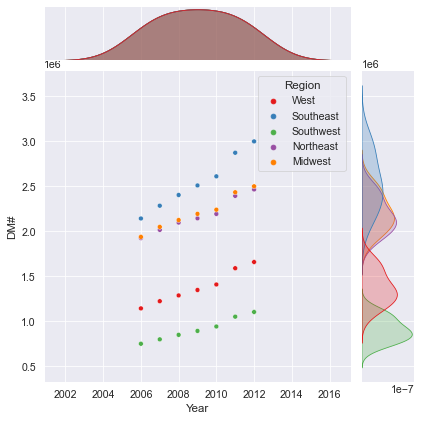

In [23]:
#fig, ax = plt.subplots()
sns.set_context('paper', font_scale=1.2)
sns.jointplot(x='Year', y='DM#', data=cardio_data, hue='Region', kind='scatter', palette='Set1')
sns.despine(left=False)

plt.savefig('../images/DM_Trends.png', dpi=300)
#ax.set_title('# of Individuals with Diabetes Mellitus.')

 ## <div align="center"> Research Question: <div>
 ### <div align="center"> How do various cardiovascular diseases in the 5 US regions change over the years of 2006-2012? <div>

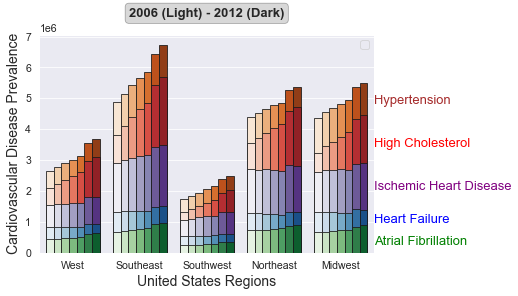

In [143]:
fig, ax = plt.subplots()
a = sns.barplot(x='Region', y='HYP#', data=cardio_data, hue='Year', palette='Oranges', edgecolor='k')
b = sns.barplot(x='Region', y='HC#', data=cardio_data, hue='Year', palette='Reds', edgecolor='k')
c = sns.barplot(x='Region', y='IHD#', data=cardio_data, hue='Year', palette='Purples', edgecolor='k')
d = sns.barplot(x='Region', y='HF#', data=cardio_data, hue='Year', palette='Blues', edgecolor='k')
e = sns.barplot(x='Region', y='AF#', data=cardio_data, hue='Year', palette='Greens', edgecolor='k')
plt.legend('')
plt.text(1, 0.7, 'Hypertension', color='brown',
         horizontalalignment='left',
         verticalalignment='center',
         bbox=dict(facecolor='white', alpha=0, boxstyle='round'),
         fontsize=13,
        transform=ax.transAxes)
plt.text(1, 0.5, 'High Cholesterol', color='red',
         horizontalalignment='left',
         verticalalignment='center',
         bbox=dict(facecolor='white', alpha=0, boxstyle='round'),
         fontsize=13,
        transform=ax.transAxes)
plt.text(1, 0.3, 'Ischemic Heart Disease', color='purple',
         horizontalalignment='left',
         verticalalignment='center',
         bbox=dict(facecolor='white', alpha=0, boxstyle='round'),
         fontsize=13,
        transform=ax.transAxes)
plt.text(1, 0.15, 'Heart Failure', color='blue',
         horizontalalignment='left',
         verticalalignment='center',
         bbox=dict(facecolor='white', alpha=0, boxstyle='round'),
         fontsize=13,
        transform=ax.transAxes)
plt.text(1, 0.05, 'Atrial Fibrillation', color='green',
         horizontalalignment='left',
         verticalalignment='center',
         bbox=dict(facecolor='white', alpha=0, boxstyle='round'),
         fontsize=13,
        transform=ax.transAxes)
plt.text(0.5, 1.1, '2006 (Light) - 2012 (Dark)', fontweight='semibold',
         horizontalalignment='center',
         verticalalignment='center',
         bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round', edgecolor='black'),
         fontsize=13,
        transform=ax.transAxes)
plt.ylabel('Cardiovascular Disease Prevalence', fontsize=14)
plt.xlabel('United States Regions', fontsize=14)

plt.savefig('../images/Cardiovascular_Trends.pdf', dpi=300, bbox_inches='tight')

- Trends in each region of the US for number of individuals with hypertension, high cholesterol, ischemic heart disease, heart failure, and atrial fibrillation in Medicare each year from 2006-2012.
- Interestingly, there is an upward trend in the number of people who enroll in Medicare and have these associated pathologies year over year. Of note, ischemic heart disease and heart failure have the smallest relative changes year over year in terms of increases in patients with those pathologies.
- Notably, data taken from the [United States Population Growth](https://www.census.gov/popclock/data_tables.php?component=growth) from 2010 and 2011 demonstrate that percentage of total US population in the West (23.3%), South (37.1%), Midwest (21.7%), and Northeast (17.9%) suggest that there should be similar levels seen in the West, Northeast, and Midwest based on relatively similar percentages.  This is however not the case as even though the West has a higher population than both the Northeast and Midwest, it has a lower level of cardiovascular disease comparatively.
- For our data, we split the South into Southeast and Southwest as suggested from various online sources. However, the aggregation of of these two regions together give us similar levels to double the incidence of cardiovascular disease which would be expected with a doublely large population in the South (37.1%).
- Hypertension appears to have a large spike in 2011 for all regions which I found interesting. There might have been changes in accessibility to Medicare in 2011 that allowed a higher inclusion level of individuals to join the program.

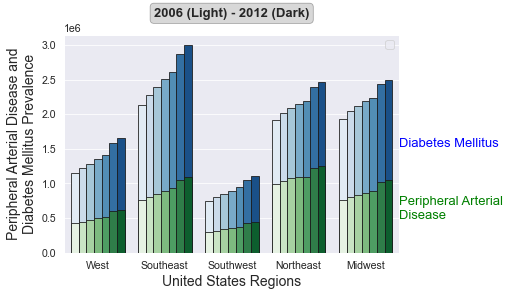

In [130]:
fig, ax = plt.subplots()
a = sns.barplot(x='Region', y='DM#', data=cardio_data, hue='Year', palette='Blues', edgecolor='k')
b = sns.barplot(x='Region', y='PAD#', data=cardio_data, hue='Year', palette='Greens', edgecolor='k')
plt.legend('')
plt.text(1, 0.5, 'Diabetes Mellitus', color='blue',
         horizontalalignment='left',
         verticalalignment='center',
         bbox=dict(facecolor='white', alpha=0, boxstyle='round'),
         fontsize=13,
        transform=ax.transAxes)
plt.text(1, 0.2, 'Peripheral Arterial\nDisease', color='green',
         horizontalalignment='left',
         verticalalignment='center',
         bbox=dict(facecolor='white', alpha=0, boxstyle='round'),
         fontsize=13,
        transform=ax.transAxes)
plt.text(0.5, 1.1, '2006 (Light) - 2012 (Dark)', fontweight='semibold',
         horizontalalignment='center',
         verticalalignment='center',
         bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round', edgecolor='black'),
         fontsize=13,
        transform=ax.transAxes)
plt.ylabel('Peripheral Arterial Disease and\nDiabetes Mellitus Prevalence', fontsize=14)
plt.xlabel('United States Regions', fontsize=14)

plt.savefig('../images/DM_PAD_Trends.pdf', dpi=300, bbox_inches='tight')

- Looking at diabetes mellitus and peripheral arterial disease in isolation for this comparison.
- Diabetes is one of the leading issues that gives rise to peripheral arterial disease as the dysregulation of sugars leads to death of neurons (neuropathy) which impairs vasoconstriction and vasodilation as there is no neural control and ultimately leads to peripheral arterial disease (stiff vasculature).
- This comparison shows us that in about 50% of Diabetes Mellitus cases, there is that number of peripheral arterial disease patients. While it is tempting to think that PAD is a subset of DM patients, that is not the case, and they can be exclusive of each other. This data is incomplete on how many of these patient demographics overlap but in a broad sweeping generalization, this is interesting to look at.
- Generally, there is a consistent increase year over year for DM but PAD again appears to jump slightly from 2010 to 2011.

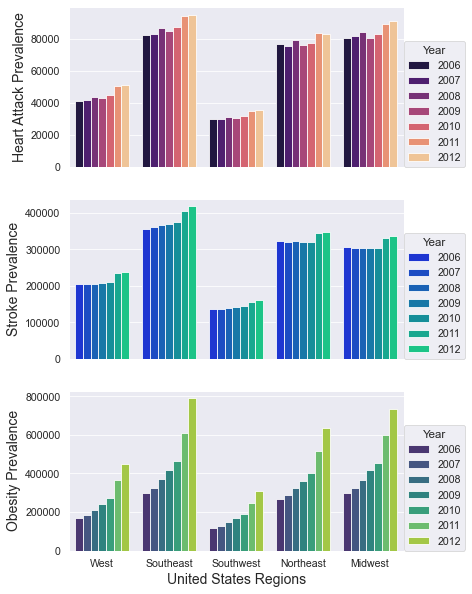

In [141]:
fig, ax = plt.subplots(3,1, sharex=True, figsize=(6,10))

a = sns.barplot(ax=ax[0], x='Region', y='HA#', data=cardio_data, hue='Year', palette='magma')
b = sns.barplot(ax=ax[1], x='Region', y='STROKE#', data=cardio_data, hue='Year', palette='winter')
c = sns.barplot(ax=ax[2], x='Region', y='OBES#', data=cardio_data, hue='Year', palette='viridis')
ax[0].legend(loc=(1,0), title='Year')
ax[1].legend(loc=(1,0), title='Year')
ax[2].legend(loc=(1,0), title='Year')

ax[0].set_ylabel('Heart Attack Prevalence', fontsize=14)
ax[1].set_ylabel('Stroke Prevalence', fontsize=14)
ax[2].set_ylabel('Obesity Prevalence', fontsize=14)

ax[0].set_xlabel('', fontsize=14)
ax[1].set_xlabel('', fontsize=14)
ax[2].set_xlabel('United States Regions', fontsize=14)

plt.xlabel('United States Regions', fontsize=14)

plt.savefig('../images/Stroke_HA_OBES_trends.pdf', dpi=300, bbox_inches='tight')

- Looking at heart attacks, stroke, and obesity in isolation. The reason these graphs were not overlayed is that they have very similar numbers of people in each category which would cause some data to end up obscuring other data if graphed the same way as previous data.
- Heart attacks and strokes may appear to have very small numbers for Medicare inclusion, but this can be due to a couple of factors: 1) Heart attacks and strokes can be fatal which would limit the inclusion of people getting Medicare; 2) They are more rare events that are often preceded by things such as high cholesterol, hypertension, or heart failure.
- At a first glance, this obesity data seems very underwhelming in terms of the number of people with obesity. This can be justified by understanding that Medicare is for those who are +65 in age for the most part while Medicaid is responsible for severe disability and disease unrestricted to age. It is however alarming to note that obesity had such a large spike in prevalence from 2010 onwards.

# Conclusions from Data

Entering this semester, I was interested in exploring United States Medicare data to determine the occurrence of cardiovascular disease in various regions. Based on the information found from the above three graphs, there are a couple conclusions that we can draw from out data:

1. Hypertension was the most common cardiovascular disease across all years and regions while heart attacks were the least common cardiovascular disease.
2. Obesity was surprisingly low but that is most likely a symptom of fewer people surviving later in life (65+) when there are serious associated health problems that often come with other complications and morbidities.
3. Despite a similar population level as evidenced [here](https://www.census.gov/popclock/data_tables.php?component=growth), the West region of the United States does have a lower incidence of cardiovascular disease compared to other regions.
4. There was a year over year increase in pretty much all cardiovascular diseases aside from some years where there was similar levels or slightly decreased levels of disease prevalence (e.g., heart attacks in the Northeast from 2008 to 2009).

While this data is limited by not knowing the breakdown of demographics for each cardiovascular disease, the main findings are year over year increases in Medicare use, less Medicare use in the West, and hypertension and heart attacks being the most and least common cardiovascular diseases, respectively.